Read data: Select only request data of department "DPW - Street Maintenance"

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
data = pd.read_csv('../DPW_data_r3y.csv')
data.head()

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,create_date_utc,last_action_et,last_action_utc,closed_date_et,closed_date_utc,origin,street,cross_street,street_id,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy,date
0,1,827262,1,f,open,0,DPW - Administration,Park Shelter,543,2024-03-12 10:50:00,2024-03-12T14:50:00,2024-03-12 10:50:00,2024-03-12T14:50:00,NaN,NaN,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-03-12
1,2,720661,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-20 07:52:00,2023-03-20T11:52:00,2023-03-20 07:52:00,2023-03-20T11:52:00,NaN,NaN,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2023-03-20
2,3,722010,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-24 07:44:00,2023-03-24T11:44:00,2023-03-24 07:44:00,2023-03-24T11:44:00,NaN,NaN,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2023-03-24
3,4,846915,1,f,open,0,Police - Zones 1-6,Illegal Parking,417,2024-05-19 12:24:00,2024-05-19T16:24:00,2024-05-19 12:24:00,2024-05-19T16:24:00,NaN,NaN,Website,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-05-19
4,5,853708,1,f,open,0,DPW - Facilities,City Facility,375,2024-06-06 23:04:00,2024-06-07T03:04:00,2024-06-06 23:04:00,2024-06-07T03:04:00,NaN,NaN,Website,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-06-06


In [8]:
dpw_sm = data[data['dept'] == 'DPW - Street Maintenance']
dpw_sm.head()

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,create_date_utc,last_action_et,last_action_utc,closed_date_et,closed_date_utc,origin,street,cross_street,street_id,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy,date
55,65,755693,1,f,in progress,3,DPW - Street Maintenance,"Litter, Public Property",831,2023-07-08 11:38:00,2023-07-08T15:38:00,2023-07-10 11:31:00,2023-07-10T15:31:00,NaN,NaN,Website,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2023-07-08
74,86,880597,1,t,closed,1,DPW - Street Maintenance,Trail Maintenance,541,2024-08-28 08:23:00,2024-08-28T12:23:00,2024-12-26 12:45:00,2024-12-26T17:45:00,2024-12-26T12:45:00,2024-12-26T17:45:00,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-08-28
147,177,882900,1,t,closed,1,DPW - Street Maintenance,Street Cleaning/Sweeping,317,2024-09-05 09:41:00,2024-09-05T13:41:00,2024-09-27 06:35:00,2024-09-27T10:35:00,2024-09-27T06:35:00,2024-09-27T10:35:00,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-09-05
380,454,873480,1,t,closed,1,DPW - Street Maintenance,Trail Maintenance,541,2024-08-06 11:35:00,2024-08-06T15:35:00,2024-12-26 12:51:00,2024-12-26T17:51:00,2024-12-26T12:51:00,2024-12-26T17:51:00,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-08-06
560,669,738943,1,f,open,0,DPW - Street Maintenance,"Litter, Public Property",831,2023-05-22 10:12:00,2023-05-22T14:12:00,2023-05-22 10:12:00,2023-05-22T14:12:00,NaN,NaN,Website,NaN,NaN,0.0,0.0,Pittsburgh,NaN,4.200398e+10,6.0,NaN,NaN,40.446306,-80.027041,EXACT,2023-05-22


In [9]:
# Check duplicated data
dups = dpw_sm.duplicated()
dups.any()

False

### Part 1. Predict resolution time for each request type

#### 1. Check and select requests that are already closed

In [10]:
# Check the count and percentage of status_name = 'closed' requests
status_counts = dpw_sm['status_name'].value_counts()
print(status_counts)
closed_pct = status_counts['closed'] / status_counts.sum()
print(f"Percentage of 'closed': {closed_pct:.2%}")


status_name
closed         37111
in progress     1187
open             782
on hold           10
Name: count, dtype: int64
Percentage of 'closed': 94.94%


In [11]:
# Select only status == "closed" requests for training and testing the model
sm_closed = dpw_sm[dpw_sm['status_name'] == 'closed'].copy()
sm_closed.shape[0]

37111

In [12]:
sm_closed.columns

Index(['_id', 'group_id', 'num_requests', 'parent_closed', 'status_name',
       'status_code', 'dept', 'request_type_name', 'request_type_id',
       'create_date_et', 'create_date_utc', 'last_action_et',
       'last_action_utc', 'closed_date_et', 'closed_date_utc', 'origin',
       'street', 'cross_street', 'street_id', 'cross_street_id', 'city',
       'neighborhood', 'census_tract', 'council_district', 'ward',
       'police_zone', 'latitude', 'longitude', 'geo_accuracy', 'date'],
      dtype='object')

#### 2. Creating Y-label: Resolution time (hr)

In [13]:
# y-label: calculate resolution time (in mins)
print(sm_closed['create_date_et'].dtype, sm_closed['closed_date_et'].dtype)

# Parse datetime and create resolution time
sm_closed['create_date'] = pd.to_datetime(sm_closed['create_date_et'], errors='coerce')
sm_closed['closed_date'] = pd.to_datetime(sm_closed['closed_date_et'], errors='coerce')
print(sm_closed[['create_date', 'closed_date']].isnull().sum())


object object
create_date    0
closed_date    0
dtype: int64


In [14]:
sm_closed['resolution_time_hr'] = (sm_closed['closed_date'] - sm_closed['create_date']).dt.total_seconds() / 3600
sm_closed.head()

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,create_date_utc,last_action_et,last_action_utc,closed_date_et,closed_date_utc,origin,street,cross_street,street_id,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy,date,create_date,closed_date,resolution_time_hr
74,86,880597,1,t,closed,1,DPW - Street Maintenance,Trail Maintenance,541,2024-08-28 08:23:00,2024-08-28T12:23:00,2024-12-26 12:45:00,2024-12-26T17:45:00,2024-12-26T12:45:00,2024-12-26T17:45:00,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-08-28,2024-08-28 08:23:00,2024-12-26 12:45:00,2884.366667
147,177,882900,1,t,closed,1,DPW - Street Maintenance,Street Cleaning/Sweeping,317,2024-09-05 09:41:00,2024-09-05T13:41:00,2024-09-27 06:35:00,2024-09-27T10:35:00,2024-09-27T06:35:00,2024-09-27T10:35:00,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-09-05,2024-09-05 09:41:00,2024-09-27 06:35:00,524.900000
380,454,873480,1,t,closed,1,DPW - Street Maintenance,Trail Maintenance,541,2024-08-06 11:35:00,2024-08-06T15:35:00,2024-12-26 12:51:00,2024-12-26T17:51:00,2024-12-26T12:51:00,2024-12-26T17:51:00,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-08-06,2024-08-06 11:35:00,2024-12-26 12:51:00,3409.266667
853,1023,885954,1,t,closed,1,DPW - Street Maintenance,Street Obstruction/Closure,26739,2024-09-16 11:37:00,2024-09-16T15:37:00,2024-09-25 07:02:00,2024-09-25T11:02:00,2024-09-25T07:02:00,2024-09-25T11:02:00,Website,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-09-16,2024-09-16 11:37:00,2024-09-25 07:02:00,211.416667
1031,1238,869173,1,t,closed,1,DPW - Street Maintenance,"Litter, Public Property",831,2024-07-23 16:34:00,2024-07-23T20:34:00,2024-09-25 09:36:00,2024-09-25T13:36:00,2024-09-25T09:36:00,2024-09-25T13:36:00,Website,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-07-23,2024-07-23 16:34:00,2024-09-25 09:36:00,1529.033333


#### 3. Remove Unnecessary Columns

In [15]:
# Check current columns in the dataframe
sm_closed.columns

Index(['_id', 'group_id', 'num_requests', 'parent_closed', 'status_name',
       'status_code', 'dept', 'request_type_name', 'request_type_id',
       'create_date_et', 'create_date_utc', 'last_action_et',
       'last_action_utc', 'closed_date_et', 'closed_date_utc', 'origin',
       'street', 'cross_street', 'street_id', 'cross_street_id', 'city',
       'neighborhood', 'census_tract', 'council_district', 'ward',
       'police_zone', 'latitude', 'longitude', 'geo_accuracy', 'date',
       'create_date', 'closed_date', 'resolution_time_hr'],
      dtype='object')

In [16]:
# Remove unecessary data (duplicate information or filtered columns)
cols_to_drop = [
    '_id', 'parent_closed','status_name', 'status_code', 'dept', 'request_type_id',
    'create_date_et', 'create_date_utc', 'last_action_et', 'last_action_utc',
    'closed_date_et', 'closed_date_utc', 'street_id', 'cross_street_id', 'date'
]

sm_cleaned = sm_closed.drop(columns=[col for col in cols_to_drop if col in sm_closed.columns])


In [17]:
sm_cleaned.columns

Index(['group_id', 'num_requests', 'request_type_name', 'origin', 'street',
       'cross_street', 'city', 'neighborhood', 'census_tract',
       'council_district', 'ward', 'police_zone', 'latitude', 'longitude',
       'geo_accuracy', 'create_date', 'closed_date', 'resolution_time_hr'],
      dtype='object')

#### 4. Handle Missing Values

In [18]:
# Check missing values (count & percentage) for each column
missing_count = sm_cleaned.isnull().sum()
missing_pct = (sm_cleaned.isnull().mean() * 100).round(2)

missing_df = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percentage': missing_pct
}).sort_values(by='missing_count', ascending=False)

# Columns with missing values > 0
missing_df[missing_df['missing_count'] > 0]

,missing_count,missing_percentage
cross_street,29210,78.71
census_tract,28432,76.61
street,490,1.32
neighborhood,288,0.78
police_zone,283,0.76
ward,269,0.72
council_district,227,0.61
latitude,170,0.46
longitude,170,0.46


In [19]:
# Drop top 2 columns with the most missing values (too sparse)
cols_to_drop = ['cross_street', 'census_tract']
sm_cleaned = sm_cleaned.drop(columns=[col for col in cols_to_drop if col in sm_cleaned.columns])


In [20]:
# Drop rows with missing values (small percentage)
sm_cleaned = sm_cleaned.dropna()
sm_cleaned.shape

(36528, 16)

In [21]:
sm_cleaned['request_type_name'].value_counts().loc[['Potholes (DO NOT USE)', 'Snow/Ice Removal (DO NOT USE)']]

request_type_name
Potholes (DO NOT USE)            8
Snow/Ice Removal (DO NOT USE)    4
Name: count, dtype: int64

In [22]:
# Drop request types (e.g. 'Potholes (DO NOT USE)' and 'Snow/Ice Removal (DO NOT USE)')
sm_cleaned = sm_cleaned[~sm_cleaned['request_type_name'].isin(['Potholes (DO NOT USE)', 'Snow/Ice Removal (DO NOT USE)'])]
sm_cleaned.shape

(36516, 16)

#### 5. Feature Engineering       
    a. create_period: the time period that a request is made        
    b. create_year: the year that a request is made       
    c. create_month: the month that a request is made       
    d. create_weekday: the weekday that a request is made      
    e. create_hour: the hour that a request is made       
    f. type_last_month_count: the number of that type of request being made last month          
    g. type_last_month_avg_resolution: the average resolution time (in hr) of that type of request being made last month          

In [23]:
# a. create_period
def hour_to_period_4(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

sm_cleaned['create_period'] = sm_cleaned['create_date'].dt.hour.apply(hour_to_period_4)

# b ~ e. create_year, create_month, create_weekday, create_hour
sm_cleaned['create_year'] = sm_cleaned['create_date'].dt.year
sm_cleaned['create_month'] = sm_cleaned['create_date'].dt.month
sm_cleaned['create_weekday'] = sm_cleaned['create_date'].dt.weekday
sm_cleaned['create_hour'] = sm_cleaned['create_date'].dt.hour


# f. type_last_month_count
sm_cleaned['year_month'] = sm_cleaned['create_date'].dt.to_period('M')
## Calculate the number of different types of request being made in each year, each month
type_monthly_counts = (
    sm_cleaned
    .groupby(['request_type_name', 'year_month'])
    .size()
    .reset_index(name = 'monthly_type_count')
)
## Add a month to the year_month column to link to the month after the current one
type_monthly_counts['year_month'] = type_monthly_counts['year_month'] + 1
## Merge it with the original data
sm_cleaned = sm_cleaned.merge(
    type_monthly_counts,
    on = ['request_type_name', 'year_month'],
    how = 'left'
)
## Fill missing values (e.g. no request in the previous month) with 0
sm_cleaned['monthly_type_count'] = sm_cleaned['monthly_type_count'].fillna(0)
## Rename the column to indicate it represents the last month
sm_cleaned.rename(columns={'monthly_type_count': 'type_last_month_count'}, inplace=True)

# g. type_last_month_avg_resolutio
## Calculate the average resolution time for each request type in each year, each month
type_month_avg = (
    sm_cleaned
    .groupby(['request_type_name', 'year_month'])['resolution_time_hr']
    .mean()
    .reset_index()
    .rename(columns={'resolution_time_hr': 'type_last_month_avg_resolution'})
)
## Add a month to the year_month column to link to the month after the current one
type_month_avg['year_month'] = type_month_avg['year_month'] + 1
## Merge it with the original data
sm_cleaned = sm_cleaned.merge(
    type_month_avg,
    on = ['request_type_name', 'year_month'],
    how = 'left'
)
## Fill missing values with the average resolution time for that request type
type_avg = sm_cleaned.groupby('request_type_name')['resolution_time_hr'].mean()

sm_cleaned['type_last_month_avg_resolution'] = sm_cleaned.apply(
    lambda row: type_avg[row['request_type_name']]
    if pd.isna(row['type_last_month_avg_resolution']) else row['type_last_month_avg_resolution'], axis = 1
)


In [24]:
# Check the first 10 rows of the cleaned data
sm_cleaned.sort_values(by=['request_type_name', 'create_date'], ascending=False).head(10)

,group_id,num_requests,request_type_name,origin,street,city,neighborhood,council_district,ward,police_zone,latitude,longitude,geo_accuracy,create_date,closed_date,resolution_time_hr,create_period,create_year,create_month,create_weekday,create_hour,year_month,type_last_month_count,type_last_month_avg_resolution
31952,909770,1,Weeds/Debris,Website,HARTWOOD DR,Pittsburgh,Point Breeze,9.0,14.0,4.0,40.447591,-79.906436,EXACT,2024-12-12 09:54:00,2024-12-13 13:03:00,27.150000,Morning,2024,12,3,9,2024-12,1.0,701.233333
31278,904736,1,Weeds/Debris,Call Center,AZURE ST,Pittsburgh,Stanton Heights,9.0,10.0,5.0,40.472445,-79.934386,EXACT,2024-11-20 08:50:00,2024-12-19 14:04:00,701.233333,Morning,2024,11,2,8,2024-11,6.0,665.802778
30779,892382,1,Weeds/Debris,Website,MATHEWS AVE,Pittsburgh,Knoxville,3.0,30.0,3.0,40.413111,-79.992143,EXACT,2024-10-09 09:16:00,2024-11-05 14:01:00,652.750000,Morning,2024,10,2,9,2024-10,8.0,767.622917
30807,892226,1,Weeds/Debris,Website,E WARRINGTON AVE,Pittsburgh,Allentown,3.0,18.0,3.0,40.421651,-79.995269,EXACT,2024-10-08 15:48:00,2025-01-30 15:02:00,2735.233333,Afternoon,2024,10,1,15,2024-10,8.0,767.622917
30742,891471,1,Weeds/Debris,Website,LOTUS WAY,Pittsburgh,Upper Lawrenceville,7.0,10.0,2.0,40.479047,-79.951464,EXACT,2024-10-06 10:46:00,2024-10-11 15:02:00,124.266667,Morning,2024,10,6,10,2024-10,8.0,767.622917
30711,891023,1,Weeds/Debris,Call Center,BAKER ST,Pittsburgh,Morningside,7.0,10.0,5.0,40.487866,-79.924452,EXACT,2024-10-03 14:17:00,2024-10-09 14:04:00,143.783333,Afternoon,2024,10,3,14,2024-10,8.0,767.622917
30668,890626,1,Weeds/Debris,Call Center,VERONA BLVD,Pittsburgh,Lincoln-Lemington-Belmar,9.0,12.0,5.0,40.473949,-79.887598,EXACT,2024-10-02 10:12:00,2024-10-08 11:05:00,144.883333,Morning,2024,10,2,10,2024-10,8.0,767.622917
30666,890589,1,Weeds/Debris,Website,S GRAHAM ST,Pittsburgh,Shadyside,8.0,7.0,4.0,40.456500,-79.936290,EXACT,2024-10-02 09:10:00,2024-10-10 11:04:00,193.900000,Morning,2024,10,2,9,2024-10,8.0,767.622917
111,887257,1,Weeds/Debris,Report2Gov Website,HASTINGS ST,Pittsburgh,Point Breeze,9.0,14.0,4.0,40.453050,-79.912780,EXACT,2024-09-19 19:18:00,2024-11-25 08:01:00,1596.716667,Night,2024,9,3,19,2024-09,1.0,862.550000
72,886157,1,Weeds/Debris,Report2Gov Website,MIDDLETOWN RD,Pittsburgh,Windgap,2.0,28.0,6.0,40.455558,-80.073192,EXACT,2024-09-16 17:52:00,2024-09-23 10:04:00,160.200000,Afternoon,2024,9,0,17,2024-09,1.0,862.550000


#### 6. Train / Test Data Split       
      Train: 2022/04 ~ 2024/03   
      Test: 2024/04 ~ 2025/03   

In [25]:
# Split the training and testing data based on the create_date
train_mask = (sm_cleaned['create_date'] >= '2022-04-01') & (sm_cleaned['create_date'] <= '2024-03-31')
test_mask = (sm_cleaned['create_date'] >= '2024-04-01') & (sm_cleaned['create_date'] <= '2025-03-31')
train_data = sm_cleaned[train_mask]
test_data = sm_cleaned[test_mask]
print('Size of training dataset:',len(train_data), ' | Size of testing dataset:',len(test_data))
print('Train(%) =', len(train_data) / (len(train_data) + len(test_data)) * 100)
print('Test(%) =', len(test_data) / (len(train_data) + len(test_data)) * 100)

Size of training dataset: 24538  | Size of testing dataset: 11923
Train(%) = 67.2993061078961
Test(%) = 32.70069389210389


#### 7. Model Training

In [40]:
from sklearn.metrics import root_mean_squared_error
# 'num_requests', 'create_hour', 'create_weekday', 'create_month', 'request_type_name', 'origin' -> 
# MAE: 369.91 hours
# RMSE: 736.00 hours
# -- weekday, month, hour to categorical
# MAE: 340.43 hours
# RMSE: 694.73 hours
# -- create period, without hour --
# MAE: 340.16 hours
# RMSE: 688.92 hours
# -- add neightborhood -- ['num_requests', 'create_weekday', 'create_month', 'request_type_name', 'origin', 'create_period','neighborhood']
# MAE: 347.52 hours
# RMSE: 813.51 hours
# ['num_requests', 'request_type_name', 'origin', 'street', 'create_period']
# MAE: 286.86 hours
# RMSE: 714.16 hours
# ['num_requests', 'request_type_name', 'origin', 'street', 'create_period', 'create_month']
# MAE: 266.55 hours
# RMSE: 675.80 hours
# ['num_requests', 'request_type_name', 'origin', 'neighborhood', 'create_period', 'create_month']
# MAE: 348.09 hours
# RMSE: 809.58 hours
#['num_requests', 'request_type_name', 'street', 'create_period', 'create_month', 'type_last_month_count']
# MAE: 254.15 hours
# RMSE: 654.56 hours
#['request_type_name', 'street', 'create_period', 'create_month', 'type_last_month_count']
# MAE: 252.92 hours
# RMSE: 650.93 hours
# ['request_type_name', 'street', 'create_period', 'create_month', 'type_last_month_count','type_last_7day_avg_resolution']
# MAE: 244.27 hours
# RMSE: 624.49 hours
# ['request_type_name', 'street', 'create_period', 'create_month', 'type_last_month_count','type_last_month_avg_resolution']
# MAE: 218.11 hours -> RF
# RMSE: 554.79 hours

# Set features and target variable
# candidate_features = ['num_requests', 'request_type_name', 'origin', 'street', 'neighborhood', 'council_district', 'ward', 'police_zone',
#        'latitude', 'longitude', 'create_period', 'create_year', 'create_month', 'create_weekday', 'create_hour']
features = [ 'request_type_name', 'street', 'create_period', 'create_month', 'type_last_month_count','type_last_month_avg_resolution']
target = 'resolution_time_hr'

# Split the data into training and testing sets
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Preprocessing + modeling pipeline
categorical = ['request_type_name', 'create_period', 'create_month'] # 'street'
numerical = ['type_last_month_count','type_last_month_avg_resolution']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop = 'first'), categorical),
        ('num', StandardScaler(), numerical)
    ]
)

models = {
    "RandomForestRegressor": RandomForestRegressor(random_state=42, n_estimators=100),
    "LinearRegression": LinearRegression(),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

# # Train and Evaluate
# pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)

# # Evaluation
# mae = mean_absolute_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared = False)

# print(f"MAE: {mae:.2f} hours")
# print(f"RMSE: {rmse:.2f} hours")
results = {}
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    results[model_name] = {"MAE": mae, "RMSE": rmse}
    #print(f"{model_name}: MAE = {metrics['MAE']:.2f} hours, RMSE = {metrics['RMSE']:.2f} hours")

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}: MAE = {metrics['MAE']:.2f} hours, RMSE = {metrics['RMSE']:.2f} hours")
    

RandomForestRegressor: MAE = 232.09 hours, RMSE = 450.44 hours
LinearRegression: MAE = 317.31 hours, RMSE = 638.70 hours
GradientBoostingRegressor: MAE = 238.06 hours, RMSE = 474.74 hours
SVR: MAE = 166.11 hours, RMSE = 412.77 hours


In [45]:
from sklearn.model_selection import GridSearchCV
# Define parameter grids for grid search
param_grids = {
    "RandomForestRegressor": {
        "model__n_estimators": [50, 100],
        "model__max_depth": [None, 10, 20]
    },
    "LinearRegression": {},  # No hyperparameters to tune for basic LinearRegression
    "GradientBoostingRegressor": {
        "model__n_estimators": [50, 100],
        "model__learning_rate": [0.05, 0.1],
        "model__max_depth": [3, 5]
    },
    "SVR": {
        "model__C": [0.1, 1, 10],
        "model__epsilon": [0.1, 0.2]
    }
}

results = {}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    param_grid = param_grids.get(model_name, {})
    
    if param_grid:
        grid_search = GridSearchCV(
            pipeline,
            param_grid,
            cv=5,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        pipeline.fit(X_train, y_train)
        best_model = pipeline
        best_params = "Default parameters"

    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    results[model_name] = {
        "MAE": mae,
        "RMSE": rmse,
        "Best Parameters": best_params
    }

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  MAE = {metrics['MAE']:.2f} hours")
    print(f"  RMSE = {metrics['RMSE']:.2f} hours")
    print(f"  Best Parameters: {metrics['Best Parameters']}\n")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

RandomForestRegressor:
  MAE = 228.20 hours
  RMSE = 437.90 hours
  Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 100}

LinearRegression:
  MAE = 317.31 hours
  RMSE = 638.70 hours
  Best Parameters: Default parameters

GradientBoostingRegressor:
  MAE = 243.28 hours
  RMSE = 432.23 hours
  Best Parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 50}

SVR:
  MAE = 164.44 hours
  RMSE = 409.78 hours
  Best Parameters: {'model__C': 10, 'model__epsilon': 0.1}



In [41]:
r_train = set(train_data['request_type_name'].unique())
r_test = set(test_data['request_type_name'].unique())
unseen_types = r_test - r_train
print("Unseen categories in 'type':", unseen_types)

Unseen categories in 'type': {'Leak', 'Street Obstruction/Closure', 'Collapsed Catch Basin', 'Commercial Refuse/Dumpsters', 'HACP', 'Sewers', 'Sidewalk has Ice or Litter', 'Litter', 'Catch Basin, Clogged', 'Sinkhole', 'Bus Shelter', 'Homeless', 'Storm Damage', 'Utility Cut - PWSA', 'DOMI Andon', 'Paving Request', 'Utility Cut - Other', 'Pruning (city tree)', 'Hydrant', 'Water Main Break'}


#### 8. Baseline Model: 
Predict resolution time based on the average resolution time for each request type and month

In [34]:
# Compute average resolution time for each request type and month in the training data
train_avg_resolution_time = (
    train_data.groupby(['request_type_name', 'create_month'])['resolution_time_hr']
    .mean()
    .reset_index()
    .rename(columns={'resolution_time_hr': 'baseline_pred'})
)

# Merge the average resolution time with the test data as test_result
test_result = test_data.copy()
test_result = test_result.merge(
    train_avg_resolution_time,
    on = ['request_type_name', 'create_month'],
    how = 'left'
)

# If the average resolution time is missing, fill it with the mean resolution time from the training data
mean_resolution_time = train_data['resolution_time_hr'].mean()
test_result['baseline_pred'].fillna(mean_resolution_time, inplace = True)

# Compute the baseline MAE and RMSE
baseline_mae = mean_absolute_error(test_result['resolution_time_hr'], test_result['baseline_pred'])
baseline_rmse = root_mean_squared_error(test_result['resolution_time_hr'], test_result['baseline_pred'])

print(f"Smart Baseline MAE (by type & month): {baseline_mae:.2f} hours")
print(f"Smart Baseline RMSE (by type & month): {baseline_rmse:.2f} hours")


Smart Baseline MAE (by type & month): 325.71 hours
Smart Baseline RMSE (by type & month): 541.62 hours


/var/folders/3x/l24krrq13yscf55fq7grlg9h0000gn/T/ipykernel_19899/2089027172.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_result['baseline_pred'].fillna(mean_resolution_time, inplace = True)


In [47]:
# Add the model predictions to the test_result DataFrame
test_result['model_pred'] = y_pred

In [48]:
# Check the model predictions is added correctly
model_mae = mean_absolute_error(test_result['resolution_time_hr'], test_result['model_pred'])
model_rmse = root_mean_squared_error(test_result['resolution_time_hr'], test_result['model_pred'])

print(f"Model MAE: {model_mae:.2f} hours")
print(f"Model RMSE (by type & month): {model_rmse:.2f} hours")

Model MAE: 164.44 hours
Model RMSE (by type & month): 409.78 hours


In [49]:
test_result.loc[:10,['request_type_name', 'street', 'create_period', 'create_month', 'type_last_month_count','type_last_month_avg_resolution', 'resolution_time_hr', 'baseline_pred', 'model_pred']]

,request_type_name,street,create_period,create_month,type_last_month_count,type_last_month_avg_resolution,resolution_time_hr,baseline_pred,model_pred
0,Trail Maintenance,E Ohio St,Morning,8,15.0,214.966667,1226.650000,1510.128030,109.955334
1,Trail Maintenance,31st St Bridge Ramp,Morning,8,15.0,214.966667,1226.566667,1510.128030,109.955334
2,Overgrowth,RIALTO ST,Morning,9,134.0,203.718532,435.933333,1358.423519,139.252899
3,Public Right of Way,WELSER WAY,Morning,9,43.0,195.605039,74.650000,910.649747,127.188841
4,Homeless,North Shore Trail,Morning,4,0.0,2835.123333,5936.716667,470.903469,308.132007
5,Utility Cut - Other,WEST COMMONS,Morning,9,2.0,165.441667,121.316667,470.903469,79.825652
6,"Litter Can, Public",Stockton Ave,Afternoon,9,48.0,179.740278,188.266667,236.131327,81.571774
7,"Litter Can, Public",Stockton Ave,Afternoon,9,48.0,179.740278,360.233333,236.131327,81.571774
8,Port A Potty,BRIGHTON RD,Morning,9,6.0,408.816667,1509.350000,2006.333333,122.042449
9,Weeds/Debris,ABDELL ST,Morning,9,1.0,862.550000,2183.100000,470.903469,171.054469


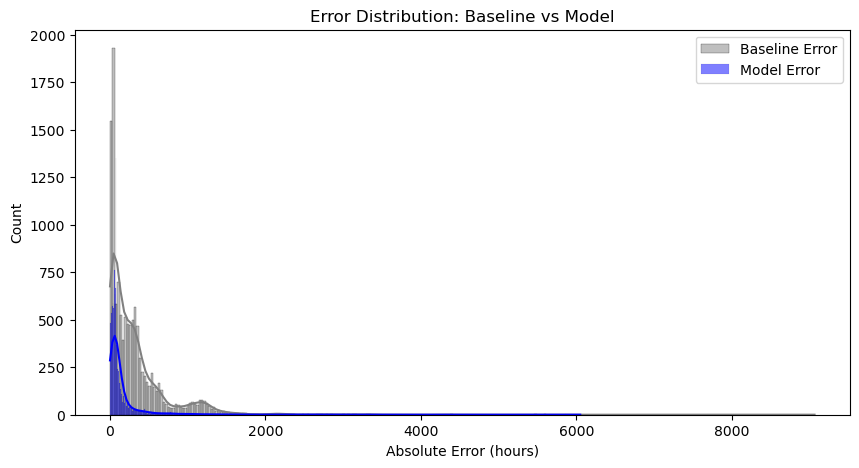

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
test_result['error_baseline'] = abs(test_result['resolution_time_hr'] - test_result['baseline_pred'])
test_result['error_model'] = abs(test_result['resolution_time_hr'] - test_result['model_pred'])

plt.figure(figsize=(10,5))
sns.histplot(test_result['error_baseline'], color='gray', label='Baseline Error', kde=True)
sns.histplot(test_result['error_model'], color='blue', label='Model Error', kde=True)
plt.xlabel('Absolute Error (hours)')
plt.title('Error Distribution: Baseline vs Model')
plt.legend()
plt.show()


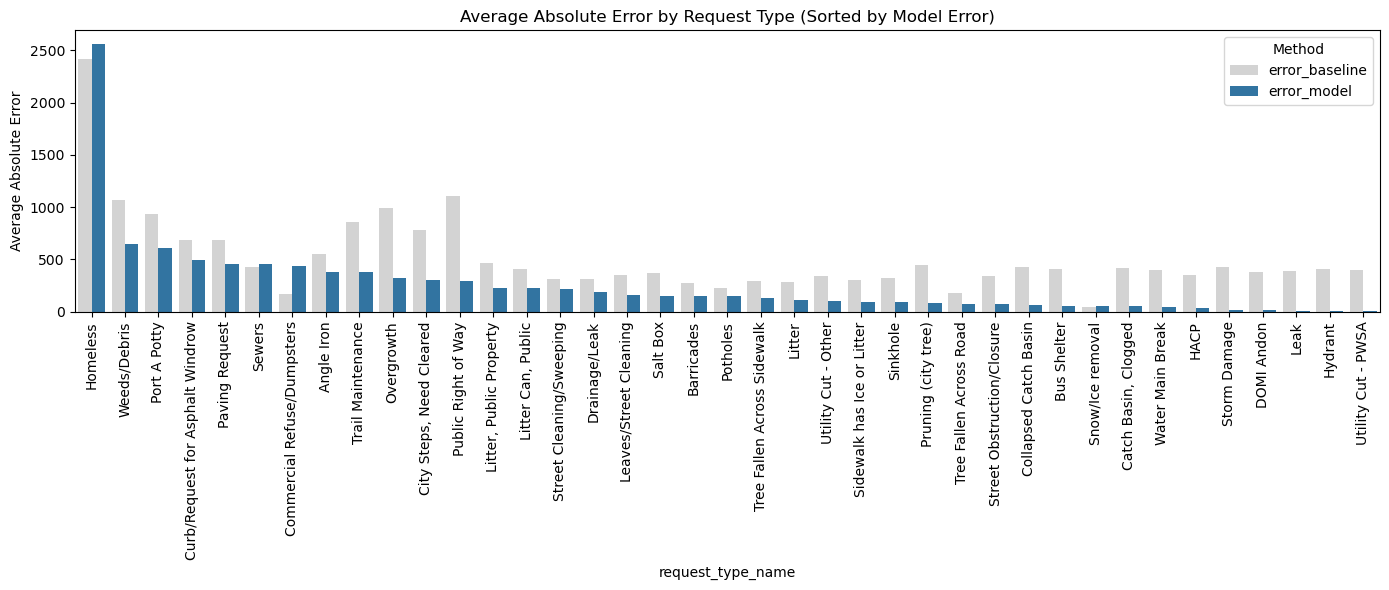

In [51]:
# Calculate the error
test_result['error_baseline'] = abs(test_result['resolution_time_hr'] - test_result['baseline_pred'])
test_result['error_model'] = abs(test_result['resolution_time_hr'] - test_result['model_pred'])

# Aggregate error by request_type_name
grouped_errors = (
    test_result
    .groupby('request_type_name')[['error_baseline', 'error_model']]
    .mean()
    .reset_index()
)

# Rank the data by model's error
grouped_errors = grouped_errors.sort_values('error_model', ascending=False)

melted = grouped_errors.melt(
    id_vars='request_type_name',
    value_vars=['error_baseline', 'error_model'],
    var_name='Method',
    value_name='Average Absolute Error'
)

# Plotting bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='request_type_name', y='Average Absolute Error', hue='Method', palette={'error_baseline': 'lightgray', 'error_model': '#1f77b4'})
plt.xticks(rotation=90)
plt.title('Average Absolute Error by Request Type (Sorted by Model Error)')
plt.tight_layout()
plt.show()
